<a href="https://colab.research.google.com/github/dourivaljunior/estudos-de-caso/blob/main/Loan_Prediction_problem_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
# importar as bibliotescas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving loan_prediction_data_old.csv to loan_prediction_data_old.csv


In [ ]:
# lendo o arquivo
df = pd.read_csv('loan_prediction_data_old.csv')

In [ ]:
df=df.drop('Loan_ID',axis=1)
x=df.drop('Loan_Status',axis=1)

treino (420, 12) (180, 12)
conjunto de teste (180, 11) (180,)
conjunto novo (13, 11) (13,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


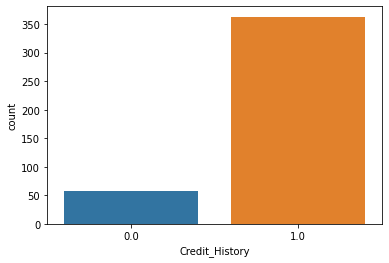

(57, 12) (363, 12)


In [ ]:
#criando os conjuntos de treino e de teste
columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome',
         'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
#separando dois conjuntos; 100 dados para treino e 500 dados para o teste e 13 para verificação
data_train=df[0:420]      
data_test=df[420:600] 
print('treino',data_train.shape,data_test.shape)  
x_test=(data_test[columns])
y_test=(data_test['Loan_Status'])
print('conjunto de teste',x_test.shape,y_test.shape)
#usar dados novos para fazer previsões novas para o modelo.
x_new_test=(df[columns]).iloc[600:613]
y_new_test=(df['Loan_Status']).iloc[600:613]
print('conjunto novo',x_new_test.shape,y_new_test.shape)
sns.countplot(data_train['Credit_History'])
plt.show()
print(data_train[data_train.Credit_History==0].shape,data_train[data_train.Credit_History==1].shape)

classe minoritária (57, 12) classe majoritária (363, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


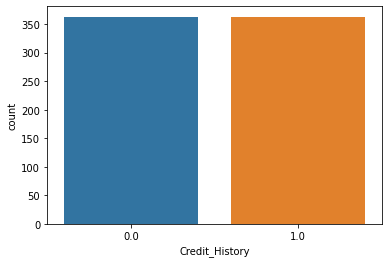

'conjunto de dados de treino balanceados'

(726, 12)

In [ ]:
# realizando o balanceamento das classes
# vamos começar a fazer o balanceamento.
# realizando o balanceamento das classes da varíavel 'Credit_History'
import sklearn
from sklearn.utils import resample
data_train_classe_minoritaria=data_train[data_train.Credit_History==0]
data_train_classe_majoritaria=data_train[data_train.Credit_History==1]
num=len(data_train_classe_majoritaria)
print('classe minoritária',data_train_classe_minoritaria.shape,'classe majoritária',data_train_classe_majoritaria.shape)
data_train_classe_minoritaria_upsampled=resample(data_train_classe_minoritaria,replace = True,n_samples =num,random_state = 25)
data_train_balanceados = pd.concat([data_train_classe_majoritaria,data_train_classe_minoritaria_upsampled])
sns.countplot(data_train_balanceados['Credit_History'])
plt.show()
display('conjunto de dados de treino balanceados',data_train_balanceados.shape)

In [ ]:
X_train=data_train_balanceados[columns]
y_train=data_train_balanceados['Loan_Status']

In [ ]:
# não vamos usar
#X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((726, 11), (726,)), ((180, 11), (180,)))

## 3. Defining the architecture of the model

In [ ]:
# checking the version of keras
import keras

In [ ]:
# checking the version of tensorflow
import tensorflow as tf

In [ ]:
# importing the sequential model
from keras.models import Sequential

In [ ]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [ ]:
# number of input neurons
X_train.shape

(726, 11)

In [ ]:
# number of features in the data
X_train.shape[1]

11

In [ ]:
# defining input neurons
input_neurons = X_train.shape[1]

In [ ]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [ ]:
# define number of output neurons
output_neurons = 1

In [ ]:
# number of hidden layers and hidden neurons
# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [ ]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
# activation function of different layers
# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [ ]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
# summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                120       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [ ]:
# number of parameters between input and first hidden layer
# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [ ]:
# number of parameters between first and second hidden layer
neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [ ]:
# number of parameters between second hidden and output layer
neuron_hidden_layer_2*output_neurons + 1

6

In [ ]:
# compiling the model
# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# training the model
# passing the independent and dependent features for training set for training the model
# validation data will be evaluated at the end of each epoch
# setting the epochs as 50
# storing the trained model in model_history variable which will be used to visualize the training process
model_history = model.fit(X_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
23/23 [==============================] - 1s 15ms/step - loss: 0.6624 - accuracy: 0.5647 - val_loss: 0.7536 - val_accuracy: 0.3111
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.5771 - val_loss: 0.7312 - val_accuracy: 0.3722
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6417 - accuracy: 0.6006 - val_loss: 0.7290 - val_accuracy: 0.3778
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6320 - accuracy: 0.6061 - val_loss: 0.7277 - val_accuracy: 0.3833
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6216 - accuracy: 0.6198 - val_loss: 0.7196 - val_accuracy: 0.4222
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.6515 - val_loss: 0.7117 - val_accuracy: 0.4500
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5993 - accuracy: 0.6749 - val_loss: 0.7042 - val_accuracy: 0.4500
Epoch 8/50
23/23 [=

In [ ]:
# getting predictions for the validation set
#prediction = model.predict_classes(X_test)

In [ ]:
# getting predictions for the validation set
#predict_x=model.predict(X_test) 
#classes_x=np.argmax(predict_x,axis=1)
#prediction = model.predict_classes(X_test)
prediction = (model.predict(x_test) > 0.5).astype("int32")

In [ ]:
# calculating the accuracy on validation set
round(accuracy_score(y_test, prediction)*100,2)

82.78

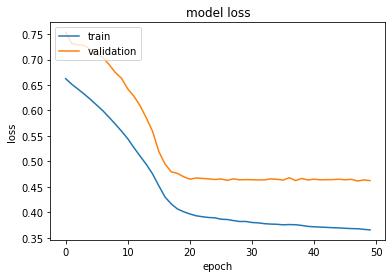

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

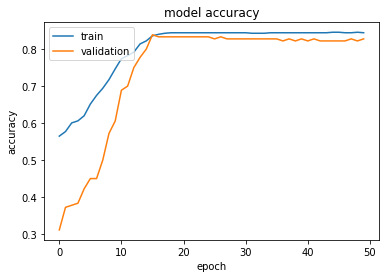

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#FIM